In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.constants as c
import astropy.units  as u

## you can undo the lines below (but it will be fun for making fancy plots!)
# to make the lines below work, you have to download the file 'PostProcessingScripts' from https://github.com/FloorBroekgaarden/common_code
# and put this in the same directory as this one, and then only use the bottom line from this code below 
import sys
sys.path.append('../../common_code') 
from PostProcessingScripts import * 

# to make the screen wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### data set from https://gwlandscape.org.au/publication/Q29tcGFzUHVibGljYXRpb25Ob2RlOjY2/  

In [2]:
path = '/Users/floorbroekgaarden/Downloads/GROWL/VanSon/COMPAS_Output_wWeights.h5' # change this line!  
fdata = h5.File(path, 'r')

print(fdata.keys())
print(fdata['BSE_Double_Compact_Objects'].keys())
print(fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned'].keys())
# print(fdata['data']['combined_dataframes'].keys())


<KeysViewHDF5 ['BSE_Double_Compact_Objects', 'BSE_RLOF', 'Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']>
<KeysViewHDF5 ['CE_Event_Counter', 'Immediate_RLOF>CE', 'MT_Donor_Hist(1)', 'MT_Donor_Hist(2)', 'Mass(1)', 'Mass(2)', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merges_Hubble_Time', 'Metallicity@ZAMS(1)', 'Optimistic_CE', 'SEED', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'mixture_weight']>
<KeysViewHDF5 ['DCOmask', 'merger_rate', 'merger_rate_z0', 'redshifts']>


In [3]:

M1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()]
weights = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['merger_rate_z0'][()]
DCOmask = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['DCOmask'][()]
print(len(M1), len(weights), len(DCOmask), len(M1[DCOmask]))

M1_BBHs = M1[DCOmask]

# plt.show()

2484379 1401406 2484379 1401406


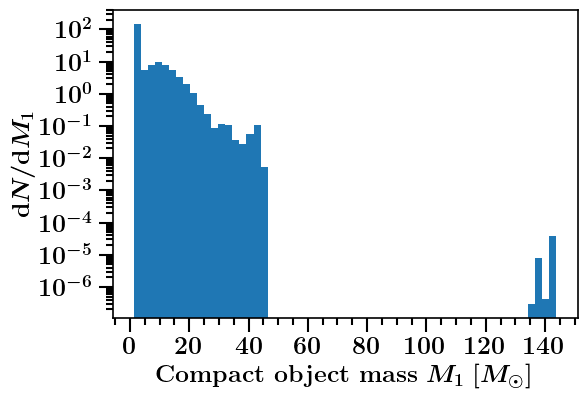

In [4]:
f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))

plt.hist(M1_BBHs, weights=weights, bins=60)
#make fancy plot: 
fontsize=16
xlabel = r'$\textbf{Compact object mass}$ $M_1$ $[M_{\odot}]$'
ylabel = r'$\textbf{d}N/\textbf{d}M_1$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()

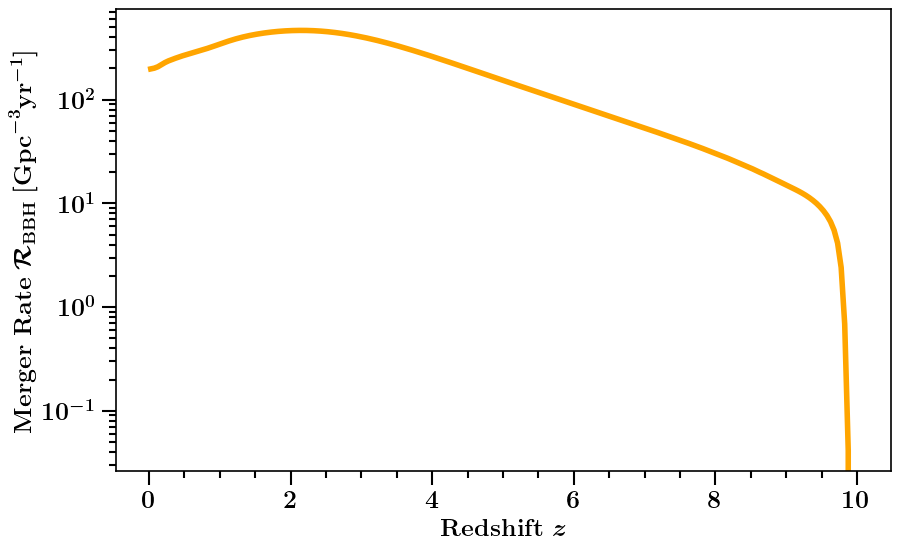

In [5]:
### let's plot the rate from the weights that were already provided in the orginal datafile ['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']

## the parameters that belong to this (check from paper)
mu_0 = 0.025
mu_z = -0.05
sigma_0 = 1.125
sigma_z = 0.05

merger_rate_per_binary_per_redshift = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['merger_rate'][()]
redshift_bin_edges   = fdata['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']['redshifts'][()]

# take the middle of the redshifts (they are currently bin edges)
redshifts = (redshift_bin_edges[:-1] + redshift_bin_edges[1:])/2 
merger_rate = np.sum(merger_rate_per_binary_per_redshift, axis=0)


f, ax= plt.subplots(ncols=1,nrows=1, figsize=(10,6))

plt.plot(redshifts, merger_rate, lw=4, color='orange')
#make fancy plot: 
fontsize=16
ylabel = r'$\textbf{Merger Rate}$ $\mathcal{R}_{\rm{BBH}}$ $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
xlabel = r'$\textbf{Redshift } z$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()


In [6]:
fdata.close()

## Now lets re-run it with different parameters 

work in progress! To be Updated soon!

In [7]:
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/cosmic_integration') 

# importing some functions from this folder 
from cosmology import * 
from ClassCOMPAS import * 
from selection_effects import * 
# sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/cosmic_integration') 
import FasterCosmicIntegration
from cosmology import get_cosmology

In [8]:
import numpy as np

In [9]:
# FasterCosmicIntegration --path='/Users/floorbroekgaarden/Downloads/GROWL/VanSon/COMPAS_Output_wWeights.h5'

In [10]:
! ls

__pycache__                         cosmic_env
cosmic-integration-SSPC.ipynb       cosmic_integration
cosmic-integration-compas-fix.ipynb example_data


In [19]:

# filename   = 'COMPASCompactOutput_BHNS_A.h5'

full_data_path = '/Users/floorbroekgaarden/Downloads/GROWL/Mandel24_modeldatasetCOMPAS/COMPASOutput.h5'

import sys
import subprocess

result = subprocess.run([sys.executable, './cosmic_integration/FasterCosmicIntegration.py',
                        '--dco_type', 'BHNS',
                        '--mu0', '0.035', '--muz', '-0.23', '--sigma0', '0.39', '--sigmaz', '0.1',  '--alpha', '0.0',
                        '--zstep', '0.1',
                        '--maxz', '10',
                        '--maxzdet', '10',
                        '--path',  '/Users/floorbroekgaarden/Downloads/GROWL/Mandel24_modeldatasetCOMPAS/COMPASOutput.h5'
                        ], capture_output=True, text=True)



print(result.stdout)
if result.stderr:
    print("Errors:", result.stderr)

# ! source ~/miniconda3/etc/profile.d/conda.sh 
# ! conda activate cosmic_env

# ! python ./cosmic_integration/FasterCosmicIntegration.py

# ! /Users/floorbroekgaarden/Projects/GitHub/GROWL-catalog-public/CosmicIntegration/cosmic_env/bin/python cosmic_integration/FasterCosmicIntegration.py  \
# --dco_type "BHNS" \
# --mu0 0.035 --muz -0.23 --sigma0 0.39 --sigmaz 0.1 --alpha 0.0 \
# --weight 'weight' \
# --zstep 1\
# --sens O3 --m1min 10. \
# --aSF 0.01 --bSF 2.77 --cSF 2.9 --dSF 4.7 \
# --path $full_data_path \
# # --dontAppend 





doing optimistic CE and yes RLOFafterCEE False
Average_SF_mass_needed =  101713412.56035414
skipping detection rates
shape redshifts (101,)
shape COMPAS.sw_weights ()
COMPAS.DCOmask [False False False ... False False False]  was set for dco_type BHNS
shape COMPAS COMPAS.DCOmask (48803,)
pathToData /Users/floorbroekgaarden/Downloads/GROWL/Mandel24_modeldatasetCOMPAS/COMPASOutput.h5
shape DCO[SEED] (48803,)
Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.1 exists, we will overrwrite the data
You will only save data up to redshift  10.0 , i.e. index 100
save_redshifts [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.

In [12]:
fdata.close()

### this now created the following file in the hdf5 file:

```'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.1'```

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.1', 'Run_Details']>

<KeysViewHDF5 ['Coalescence_Time', 'Eccentricity@DCO', 'Mass(1)', 'Mass(2)', 'Merges_Hubble_Time', 'Record_Type', 'Recycled_NS(1)', 'Recycled_NS(2)', 'SEED', 'SemiMajorAxis@DCO', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Time']>

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'merger_rate_z0', 'redshifts']>
48803 624 48803 624


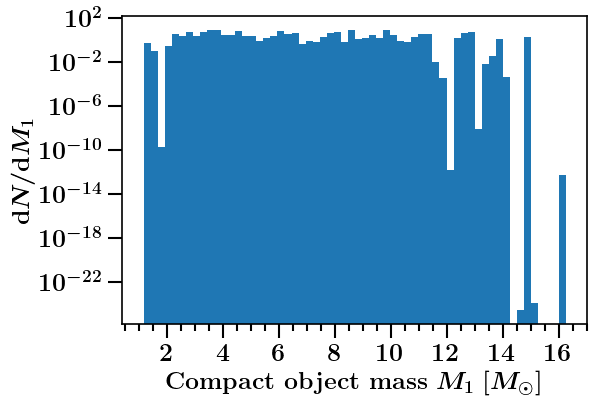

[[3.70175822e-30 4.56476587e-28 4.11777268e-26 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.04697668e-28 2.00915264e-26 1.46041425e-24 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.64537727e-01 6.59543844e-01 8.90023464e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.62785417e-01 1.12126057e+00 1.67987382e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.90273670e-01 3.09332291e-01 4.74010113e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.53960956e-03 8.48065054e-03 3.79554830e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85 3.95 4.05 4.15
 4.25 4.35 4.45 4.55 4.65 4.75 4.85 4.95 5.05 5.15 5.25 5.35 5.45 5.55
 5.65 5.75 5.85 5.95 6.05 6.15 6.25 6.35 6.45 6.55 6.65 6.75 6.85 6.95
 7.05 7.15 7.25 7.35 7.45 7.55 7.65 7.75 7.85

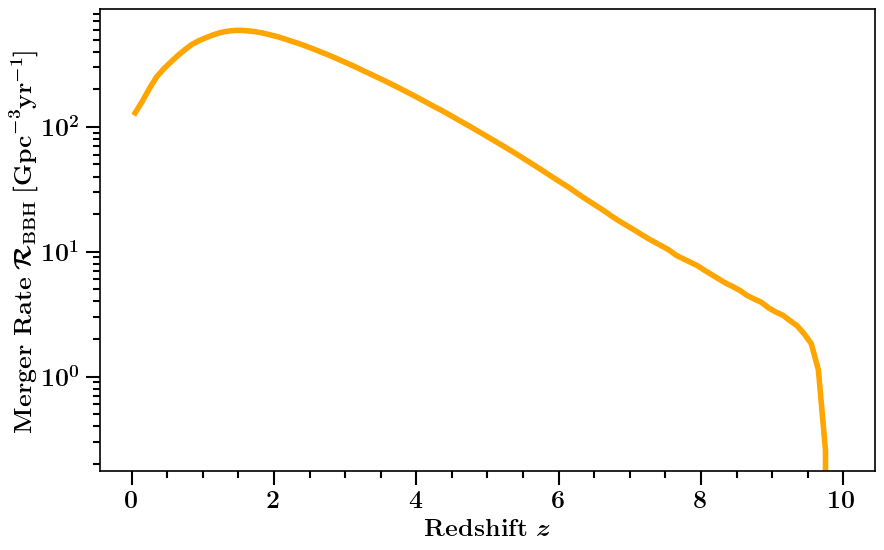

In [20]:
path =  '/Users/floorbroekgaarden/Downloads/GROWL/Mandel24_modeldatasetCOMPAS/COMPASOutput.h5' 
fdata = h5.File(path, 'r')

print(fdata.keys())
print()
print(fdata['BSE_Double_Compact_Objects'].keys())



print()
CI_key = 'Rates_mu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.1'
print(fdata[CI_key].keys())
# # print(fdata['data']['combined_dataframes'].keys())



M1 = fdata['BSE_Double_Compact_Objects']['Mass(1)'][()]
weights = fdata[CI_key]['merger_rate_z0'][()]
DCOmask = fdata[CI_key]['DCOmask'][()]
print(len(M1), len(weights), len(DCOmask), len(M1[DCOmask]))

M1_BBHs = M1[DCOmask]



f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))

plt.hist(M1_BBHs, weights=weights, bins=60)
#make fancy plot: 
fontsize=16
xlabel = r'$\textbf{Compact object mass}$ $M_1$ $[M_{\odot}]$'
ylabel = r'$\textbf{d}N/\textbf{d}M_1$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()


### let's plot the rate from the weights that were already provided in the orginal datafile ['Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_zBinned']

## the parameters that belong to this (check from paper)
# mu_0 = 0.025
# mu_z = -0.05
# sigma_0 = 1.125
# sigma_z = 0.05

merger_rate_per_binary_per_redshift = fdata[CI_key]['merger_rate'][()]
print(merger_rate_per_binary_per_redshift)
redshift_bin_edges   = fdata[CI_key]['redshifts'][()]

# take the middle of the redshifts (they are currently bin edges)
redshifts = (redshift_bin_edges[:-1] + redshift_bin_edges[1:])/2 
print(redshifts)
merger_rate = np.sum(merger_rate_per_binary_per_redshift, axis=0)
print(merger_rate)

f, ax= plt.subplots(ncols=1,nrows=1, figsize=(10,6))

plt.plot(redshifts, merger_rate, lw=4, color='orange')
#make fancy plot: 
fontsize=16
ylabel = r'$\textbf{Merger Rate}$ $\mathcal{R}_{\rm{BBH}}$ $[\rm{Gpc}^{-3} \rm{yr}^{-1}]$'
xlabel = r'$\textbf{Redshift } z$'
layoutAxes(ax=ax, nameX=xlabel, nameY=ylabel, fontsize=18) # this line is where the magic happens


plt.yscale('log')

plt.show()

fdata.close()


# # plt.show()